# BMI PREDICTION PROJECT
### by AJAY KARTHICK M

Gender : Male / Female

Height : Number (cm)

Weight : Number (Kg)

Index :

0 - Extremely Weak

1 - Weak

2 - Normal

3 - Overweight

4 - Obesity

5 - Extreme Obesity

In [1]:
import numpy as np # linear algebra
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read csv
df=pd.read_csv("/Users/antonio/Desktop/daticodice/500_Person_Gender_Height_Weight_Index.csv",sep=',',header=0)
df_2=pd.read_csv("/Users/antonio/Desktop/daticodice/500_Person_Gender_Height_Weight_Index.csv",sep=',',header=0)

In [3]:
df.head(10)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
7,Male,154,111,5
8,Male,174,90,3
9,Female,169,103,4


In [4]:
df.shape

(500, 4)

In [7]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [8]:
def convert_status(x):
    if x['Index'] == 0:
        return 'Extremely Weak'
    elif x['Index'] == 1:
        return 'Weak'
    elif x['Index'] == 2:
        return 'Normal'
    elif x['Index'] == 3:
        return 'Overweight'
    elif x['Index']== 4:
        return 'Obesity'
    elif x['Index'] == 5:
        return 'Extreme Obesity'
df_2['Status'] = df_2.apply(convert_status,axis=1)
df_2.head(10)

,Gender,Height,Weight,Index,Status
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight
5,Male,189,104,3,Overweight
6,Male,147,92,5,Extreme Obesity
7,Male,154,111,5,Extreme Obesity
8,Male,174,90,3,Overweight
9,Female,169,103,4,Obesity


<AxesSubplot:title={'center':'Average Weight for each Index value'}, xlabel='Status', ylabel='Weight'>

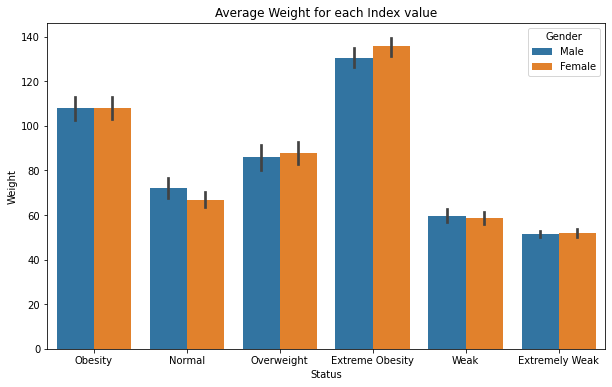

In [9]:
plt.figure(figsize = (10,6))
plt.title("Average Weight for each Index value")
sns.barplot(x = df_2["Status"], y = df_2["Weight"], hue = df_2["Gender"])

<AxesSubplot:title={'center':'Average Height for each Index value'}, xlabel='Status', ylabel='Height'>

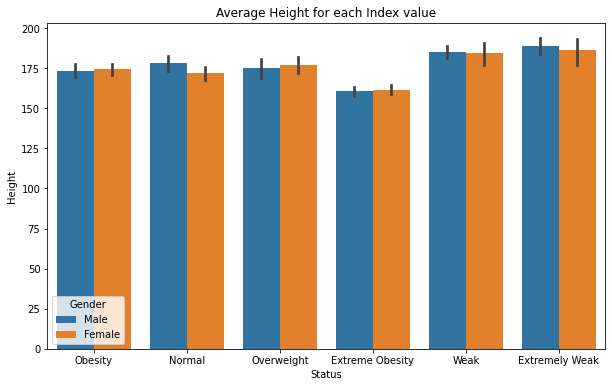

In [10]:
plt.figure(figsize = (10,6))
plt.title("Average Height for each Index value")
sns.barplot(x = df_2["Status"], y = df_2["Height"], hue = df_2["Gender"])

In [11]:
Percentage=df_2['Status'].value_counts()
Percentage

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: Status, dtype: int64

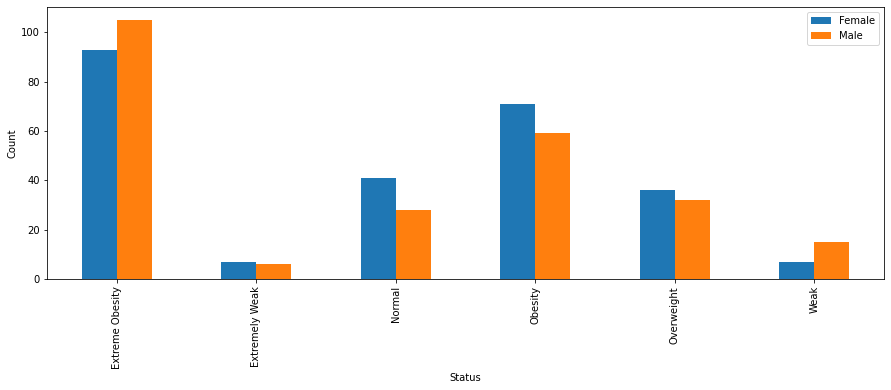

In [12]:
tab = pd.crosstab(index=df_2['Status'], columns=df_2['Gender'])
tab.plot(kind="bar", stacked=False, figsize=(15,5))
plt.xlabel('Status')
plt.ylabel('Count')
plt.legend()
plt.show()

In [14]:
gender=df_2['Gender'].value_counts()
gender

Female    255
Male      245
Name: Gender, dtype: int64

In [26]:
#Making a BMI Column using the formula for BMI
df_2["BMI"] = round(df_2["Weight"]/((df_2["Height"])/100)**2, 2)   #Weight(Kg)/Height(m)^2

In [27]:
df_2.head()

,Gender,Height,Weight,Index,Status,BMI
0,Male,174,96,4,Obesity,31.71
1,Male,189,87,2,Normal,24.36
2,Female,185,110,4,Obesity,32.14
3,Female,195,104,3,Overweight,27.35
4,Male,149,61,3,Overweight,27.48


<AxesSubplot:title={'center':'Average BMI for each Index value'}, xlabel='Status', ylabel='BMI'>

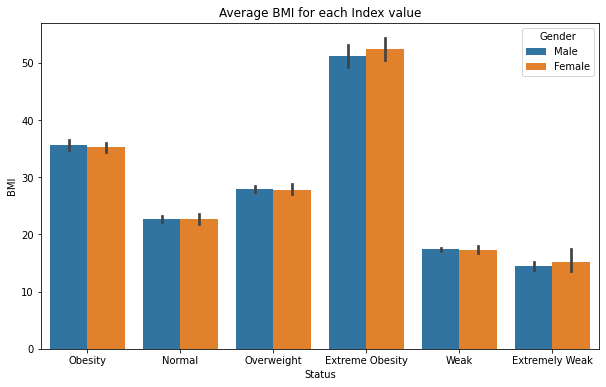

In [28]:
plt.figure(figsize = (10,6))
plt.title("Average BMI for each Index value")
sns.barplot(x = df_2["Status"], y = df_2["BMI"], hue = df_2["Gender"])

In [29]:
def convert_gender_to_label(x):
    if x['Gender'] == 'Male':
        return 1
    elif x['Gender'] == 'Female':
        return 0
df_2['gender_m_f'] = df_2.apply(convert_gender_to_label,axis=1)
df_2.head()

,Gender,Height,Weight,Index,Status,BMI,gender_m_f
0,Male,174,96,4,Obesity,31.71,1
1,Male,189,87,2,Normal,24.36,1
2,Female,185,110,4,Obesity,32.14,0
3,Female,195,104,3,Overweight,27.35,0
4,Male,149,61,3,Overweight,27.48,1


In [32]:
# representing Health Status for Female and Male
df_2_f= df_2[df_2['Gender']=='Female']
dfF=df_2_f['Status'].value_counts()

df_2_m= df_2[df_2['Gender']=='Male']
dfM=df_2_m['Status'].value_counts()

<AxesSubplot:title={'center':'Percentage distribution for Females'}, ylabel='Status'>

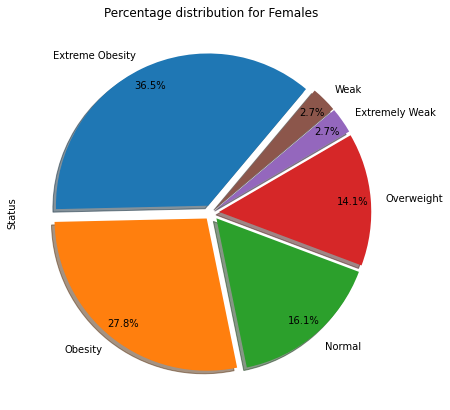

In [33]:
plt.title("Percentage distribution for Females")
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
dfF.plot.pie(autopct="%.1f%%",figsize=(7, 7),startangle=50,shadow=True,pctdistance=0.88,explode =explode )

<AxesSubplot:title={'center':'Percentage distribution for Males'}, ylabel='Status'>

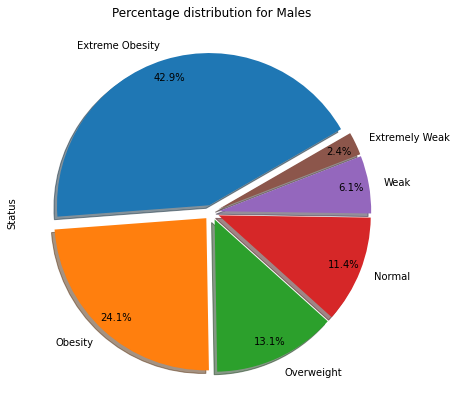

In [34]:
plt.title("Percentage distribution for Males")
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
dfM.plot.pie(autopct="%.1f%%",figsize=(7, 7),startangle=30,shadow=True,pctdistance=0.88,explode =explode)

Females are more Extremely Weak than males

Males are more Weak than females

Females are more Normal than males

Females are more Overweight than males

Females are more Obese than males

Males are more Extreme Obese than females

# train test split and resampling before ML

Prcessing Data

In [35]:
#CONVERT  VARIABLES IN categories
#Assign arbitrary numbers such as 1 to Female and 0 to Male (similar to a Boolean/Truth value) to differentiate them
df['Gender']=df['Gender'].astype('category').cat.codes

In [36]:
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


For making our predictive model we will need to proceed with certain steps:

Assign our data instances and target value (X and y columns)

Split data into training and test sets

Train our model

Test and evaluate the model

In [37]:
#Assign our data instances and target value (X and y columns)
target_name = 'Index'
X = df.drop('Index', axis=1)
y=df[target_name]

In [38]:
X.shape,y.shape

((500, 3), (500,))

In [39]:
#Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123, stratify=y)

In [40]:
#scaling data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
#Split data into training and test sets
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123, stratify=y)

In [42]:
print(X_train.shape,y_train.shape)

(400, 3) (400,)


In [43]:
y_train.value_counts()

5    159
4    104
2     55
3     54
1     18
0     10
Name: Index, dtype: int64

In [44]:
#Let us try some sampling technique to remove class imbalance

from imblearn.over_sampling import SMOTE

#Over-sampling: SMOTE
#SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, 
#based on those that already exist. It works randomly picking a point from the minority class and computing 
#the k-nearest neighbors for this point.The synthetic points are added between the chosen point and its neighbors.
#We'll use ratio='minority' to resample the minority class.

smote = SMOTE(random_state=12)
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)
print(X_train_sm.shape, y_train_sm.shape)

(954, 3) (954,)


In [45]:
print(y_train.value_counts(), y_train_sm.value_counts())

5    159
4    104
2     55
3     54
1     18
0     10
Name: Index, dtype: int64 5    159
4    159
3    159
2    159
1    159
0    159
Name: Index, dtype: int64


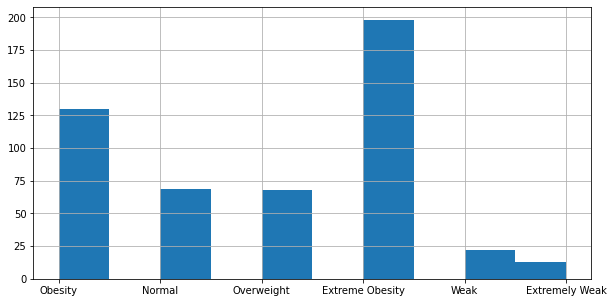

In [46]:
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
#y_train.hist(ax = ax)
df_2.Status.hist(ax=ax)
plt.show()

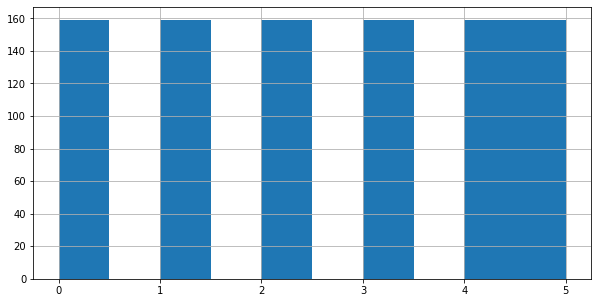

In [47]:
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
y_train_sm.hist(ax = ax)          
plt.show()

# ML MODEL

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier

# 1. Logistic Regression

In [49]:
#Logistic Regression Model CV

logis = LogisticRegression( multi_class='multinomial',max_iter=2500,C=1e5,class_weight='balanced')
clf=logis

kf = StratifiedKFold(shuffle=True, n_splits=10)
scores = cross_val_score(clf, X_train, y_train, cv=kf,scoring='accuracy')

print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.875 0.875 0.95  0.9   0.95  0.925 0.775 0.875 0.925 0.9  ]
0.90 accuracy with a standard deviation of 0.05


In [50]:
# Check accuracy of Logistic Regression Model

logis.fit(X_train_sm, y_train_sm)
logis_pred=logis.predict(X_test)

logis_accuracy=accuracy_score(y_test, logis_pred)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, logis_pred))

Logistic accuracy is 0.94


In [51]:
logis_f1 = f1_score(y_test, logis_pred,average='micro')
                                          
print(f'The f1 score for logistic regression is {round(logis_f1*100,6)}%')

The f1 score for logistic regression is 94.0%


In [52]:
#report for logistic regression
print(classification_report(y_test,logis_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.67      1.00      0.80         4
           2       0.92      0.79      0.85        14
           3       0.87      0.93      0.90        14
           4       0.96      0.96      0.96        26
           5       1.00      0.97      0.99        39

    accuracy                           0.94       100
   macro avg       0.90      0.94      0.92       100
weighted avg       0.95      0.94      0.94       100



# 2. Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
# grid search for optimum parameters
rf = RandomForestClassifier()
params = {'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}
rf_clf = GridSearchCV(rf, param_grid=params, n_jobs=-1)

In [55]:
# train the model
rf_clf.fit(X_train_sm,y_train_sm)
rf_clf.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [56]:
# Random Forest Model CV
rf = RandomForestClassifier(n_estimators=100,random_state=13, bootstrap=True,max_depth=10,min_samples_leaf=3,
                            min_samples_split=2,max_features=3)
clf=rf

kf = KFold(shuffle=True, n_splits=10)
scores = cross_val_score(clf, X_train, y_train, cv=kf,scoring='accuracy')
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.9   0.9   0.8   0.85  0.925 0.9   0.725 0.725 0.75  0.85 ]
0.83 accuracy with a standard deviation of 0.07


In [57]:
# Random Forest Model

rf.fit(X_train_sm, y_train_sm)
rf_pred=rf.predict(X_test)

rf_accuracy=accuracy_score(y_test, rf_pred)
print("Random Forest accuracy is %2.2f" % accuracy_score(y_test, rf_pred))

Random Forest accuracy is 0.91


In [58]:
rf_f1 = f1_score(y_test, rf_pred,average='micro')
                                          
print(f'The f1 score for random forest is {round(rf_f1*100,6)}%')

The f1 score for random forest is 91.0%


In [59]:
rf_precision = precision_score(y_test, rf.predict(X_test),average='micro')
                                          
print(f'The precision score for rf is {round(rf_precision*100,6)}%')

The precision score for rf is 91.0%


In [60]:
#report for random forest
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.81      0.93      0.87        14
           3       0.92      0.79      0.85        14
           4       0.92      0.88      0.90        26
           5       0.95      0.95      0.95        39

    accuracy                           0.91       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.91      0.91      0.91       100



In [61]:
print("Random Forest validation accuracy is %2.2f" % accuracy_score( y_train_sm,rf.predict(X_train_sm)))

Random Forest validation accuracy is 0.97


# 3. Gradient boost

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [437]:
gb = GradientBoostingClassifier()
# grid search for optimum parameters
params = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}
gb_clf = GridSearchCV(gb, param_grid=params, n_jobs=-1)

In [438]:
# train the model
gb_clf.fit(X_train_sm,y_train_sm)
gb_clf.best_params_

{'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [1297]:
# Gradient boost Model CV
gb = GradientBoostingClassifier(random_state=13,max_depth=110,max_features=3,min_samples_leaf=5,min_samples_split=10,
                                n_estimators=500)
clf=gb

kf = KFold(shuffle=True, n_splits=12)
scores = cross_val_score(clf, X_train, y_train, cv=kf,scoring='accuracy')
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.97058824 0.82352941 0.94117647 0.73529412 0.96969697 0.75757576
 0.75757576 0.87878788 0.78787879 0.93939394 0.78787879 0.81818182]
0.85 accuracy with a standard deviation of 0.08


In [1337]:
# Gradient boost Model
gb.fit(X_train_sm, y_train_sm)
gb_pred=gb.predict(X_test)

gb_accuracy=accuracy_score(y_test, gb_pred)
print("Gradient Boost accuracy is %2.2f" % accuracy_score(y_test, gb_pred))

Gradient Boost accuracy is 0.89


In [1338]:
gb_f1 = f1_score(y_test, gb_pred,average='micro')
                                          
print(f'The f1 score for gradient boost is {round(gb_f1*100,6)}%')

The f1 score for gradient boost is 89.0%


In [1339]:
#report for gradient boost
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.67      1.00      0.80         4
           2       0.86      0.86      0.86        14
           3       0.92      0.86      0.89        14
           4       0.95      0.77      0.85        26
           5       0.88      0.97      0.93        39

    accuracy                           0.89       100
   macro avg       0.88      0.91      0.89       100
weighted avg       0.90      0.89      0.89       100



# 4. Tensor flow

In [64]:
import tensorflow as tf

In [65]:
tf.random.set_random_seed(1)

In [66]:
# classes in Activity
num_classes=6

In [67]:
inputs = tf.keras.Input(shape=(X_train_sm.shape[1],))#shape[1] is columns
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense (Dense)                (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
Total params: 4,806
Trainable params: 4,806
Non-trainable params: 0
_________________________________________________________________


In [73]:
batch_size = 100 
# is a hyperparameter that defines the number of samples to work 
#through before updating the internal model parameters.
batch_size = 100 
epochs = 70

#denotes number of times the learning algorithm will work through the training dataset.

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit( X_train_sm, 
                    y_train_sm,
                    validation_split=0.2, 
                    batch_size=batch_size,
                
                    epochs=epochs, 
)

#callbacks=[
        #tf.keras.callbacks.ModelCheckpoint('./model.h5', save_best_only=True),
        #tf.keras.callbacks.ReduceLROnPlateau(
            #monitor='val_loss',
            #factor=0.1,
            #verbose=2,
            #patience=1
        #)
    #]

Train on 763 samples, validate on 191 samples
Epoch 1/70
763/763 [==============================] - 0s 376us/step - loss: 0.2356 - acc: 0.9279 - val_loss: 0.4510 - val_acc: 0.8586
Epoch 2/70
763/763 [==============================] - 0s 25us/step - loss: 0.2290 - acc: 0.9410 - val_loss: 0.3987 - val_acc: 0.8901
Epoch 3/70
763/763 [==============================] - 0s 36us/step - loss: 0.2265 - acc: 0.9436 - val_loss: 0.4317 - val_acc: 0.8639
Epoch 4/70
763/763 [==============================] - 0s 22us/step - loss: 0.2237 - acc: 0.9463 - val_loss: 0.4165 - val_acc: 0.8691
Epoch 5/70
763/763 [==============================] - 0s 16us/step - loss: 0.2200 - acc: 0.9423 - val_loss: 0.4124 - val_acc: 0.8639
Epoch 6/70
763/763 [==============================] - 0s 16us/step - loss: 0.2177 - acc: 0.9423 - val_loss: 0.4111 - val_acc: 0.8691
Epoch 7/70
763/763 [==============================] - 0s 22us/step - loss: 0.2146 - acc: 0.9463 - val_loss: 0.4015 - val_acc: 0.8796
Epoch 8/70
763/763 [==

In [74]:
model.evaluate(X_test, y_test, batch_size=batch_size)
#tf_accuracy=accuracy_score(y_test, tf_pred)
#print ("neural network tf accuracy is %2.2f" % accuracy_score(y_test, tf_pred))

100/100 [==============================] - 0s 14us/step


[0.20587259531021118, 0.9100000262260437]

In [76]:
#tf_pred = model.predict(X_test).argmax(axis=1)
#tf_matrix = metrics.confusion_matrix((y_test), (tf_pred))

In [77]:
tf_f1 = f1_score(y_test, tf_pred,average='micro')
                                          
print(f'The f1 score for Neural Network TF is {round(tf_f1*100,6)}%')

The f1 score for Neural Network TF is 91.0%


In [78]:
tf_precision = precision_score(y_test, tf_pred,average='micro')
                                          
print(f'The precision score for Neural Network TF is {round(tf_precision*100,6)}%')

The precision score for Neural Network TF is 91.0%


In [79]:
tf_recall = recall_score(y_test, tf_pred,average='micro')
                                          
print(f'The recall score for Neural Network TF is {round(tf_recall*100,6)}%')

The recall score for Neural Network TF is 91.0%


In [80]:
#report tf
print(classification_report(y_test, tf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.57      1.00      0.73         4
           2       0.77      0.71      0.74        14
           3       0.92      0.79      0.85        14
           4       0.96      0.96      0.96        26
           5       0.97      0.97      0.97        39

    accuracy                           0.91       100
   macro avg       0.87      0.91      0.88       100
weighted avg       0.92      0.91      0.91       100



# 5. support vector machine for multiclass classification

In [81]:
from sklearn.svm import SVC

In [83]:
# SVM Model CV
svmc = svmc = SVC(probability=True, gamma=0.001,C=1e5,decision_function_shape='ovo')
clf=svmc

kf = KFold(shuffle=True, n_splits=8)
scores = cross_val_score(clf, X_train, y_train, cv=kf,scoring='accuracy')
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.96 0.98 0.92 0.94 0.9  0.96 0.96 0.9 ]
0.94 accuracy with a standard deviation of 0.03


In [84]:
# Check accuracy of Service Vector Machine
svmc.fit(X_train_sm, y_train_sm)
svmc_pred=svmc.predict(X_test)

svmc_accuracy=accuracy_score(y_test, svmc_pred)
print ("svm accuracy is %2.2f" % accuracy_score(y_test, svmc_pred))

svm accuracy is 0.96


In [85]:
svmc_precision = precision_score(y_test, svmc_pred,average='micro')
                                          
print(f'The precision score for svmc is {round(svmc_precision*100,6)}%')

The precision score for svmc is 96.0%


In [86]:
svmc_f1 = f1_score(y_test, svmc.predict(X_test),average='micro')
                                          
print(f'The f1 score for svm is {round(svmc_f1*100,6)}%')

The f1 score for svm is 96.0%


In [87]:
svmc_recall = recall_score(y_test, svmc.predict(X_test),average='micro')
                                          
print(f'The recall score for svm is {round(svmc_recall*100,6)}%')

The recall score for svm is 96.0%


In [88]:
#report svm
print(classification_report(y_test, svmc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.80      1.00      0.89         4
           2       1.00      0.79      0.88        14
           3       0.93      1.00      0.97        14
           4       1.00      0.96      0.98        26
           5       0.97      1.00      0.99        39

    accuracy                           0.96       100
   macro avg       0.91      0.96      0.93       100
weighted avg       0.97      0.96      0.96       100



# Test and Evaluate the model

In [1407]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

## Confusion Matrix Random Forest
logis_matrix = metrics.confusion_matrix(y_test, logis_pred)
rf_matrix = metrics.confusion_matrix(y_test, rf.predict(X_test))
svmc_matrix = metrics.confusion_matrix(y_test, svmc.predict(X_test))
tf_matrix = metrics.confusion_matrix((y_test), (tf_pred))
gb_matrix = metrics.confusion_matrix(y_test, gb.predict(X_test))

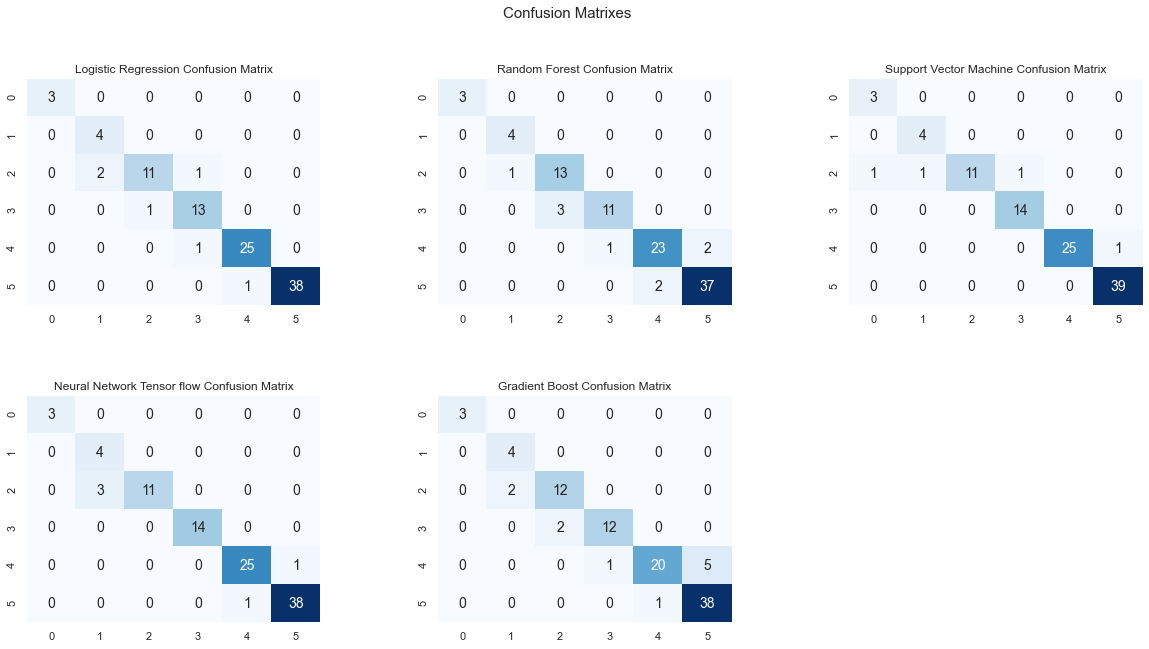

In [1408]:
plt.figure(figsize=(20,10))

plt.suptitle("Confusion Matrixes",fontsize=15)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(logis_matrix ,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 14})

plt.subplot(2,3,2)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(rf_matrix ,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 14})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(svmc_matrix ,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 14})

plt.subplot(2,3,4)
plt.title("Neural Network Tensor flow Confusion Matrix")
sns.heatmap(tf_matrix,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 14})

plt.subplot(2,3,5)
plt.title("Gradient Boost Confusion Matrix")
sns.heatmap(gb_matrix,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 14})

plt.show()

Reminder: The confusion matrix shows you the TN, TP, FN, FP. Values on the diagonal is the counting of TP so the higher these values the better the predictive ability of the model.

# Model comparison

In [1409]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':logis_accuracy},
    "Neural Network TF":{'Accuracy':tf_accuracy},
    "Random Forest":{'Accuracy':rf_accuracy},
    "Support vector machine":{'Accuracy':svmc_accuracy},
    "Gradient Boost":{'Accuracy':gb_accuracy}
}).T

comparison

,Accuracy
Logistic regression,0.94
Neural Network TF,0.95
Random Forest,0.91
Support vector machine,0.96
Gradient Boost,0.89


In [90]:

Xnew = [[0,181,72]] #Enter New Value: [Gender, Height, Weight]
Xnew = sc.transform(Xnew)
ynew = svmc.predict(Xnew)
ynew

array([2])